Python for Data Analysis, GMC, Vilnius University, 2025

# HW4: Training a succesfull machine learning (ML) model

- **Tasks in this homework are built around a single data file** which should be downloaded in the Notebook as asked in the cell after the imports.
- Packages allowed to be imported (but not necessarily needed): `scikit-learn`, `numpy`, `pandas`, `matplotlib`, `seaborn`, `tqdm`, `itertools`, `math`, `string`. Do not import any other packages.
- **You will need to upload your solutions into your Github repository** dedicated for the Python for Data Analysis course. Use the same repository used for Homework 3.
- Same requirements as for Homework 3:
   - Do not write docstrings (function description comments).
   - Keep prints informative.
   - Do not create classes.
   - Do not change assert statements.

There are 5 tasks in this Notebook. They have slightly different numbers of points between them, with subpoints shown for each subtask e.g. (0.2p). You need to collect 8 points in total to get the maximum grade.

As previously, each task consists of a text cell with task description, a code cell to solve the task, and a code cell with `assert` statements to check your code for *some* possible errors.

Don't hesitate to contact me or Martynas if you are stuck.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import itertools
import math
import string
import urllib.request

In [2]:
# download the file using the link provided, by any method you like/understand the most,
# but the downloading process should happen inside the Notebook.
file_url = "https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/hw4_2025.csv"
data = pd.read_csv(file_url, index_col = 0)
data.head()

,snail_genus,leaf_width_mm,leaf_length_mm,leaf_surface,shell_height_mm,shell_color,shell_radius_mm
0,Spiralina,69.0,114.0,hairy,7.0,striped,5.0
1,Slimospira,51.0,34.0,hairy,4.0,yellow,4.0
2,Mollisphora,47.0,114.0,hairy,6.0,striped,7.0
3,Flexorus,44.0,25.0,smooth,5.0,dark,5.0
4,Slimospira,12.0,68.0,smooth,5.0,yellow,5.0


In [3]:
# Run this cell to store the name of the column to predict.
# Use this variable when needed.
TO_PREDICT = 'snail_genus'

# 🍂 Task 1 (1 point): The new challenge

Some researchers who collected data for SNAILAB complained that measuring a single sample takes a lot of time and is quite difficult. Many snails are actually found on fallen leaves, not on whole plants, making several measurements impossible to make. Moreover, if a snail hides inside its shell, for certain measurements the researcher is forced to wait until the snail fully appears again.

An intern from SNAILAB suggested that they could use AI to solve this issue. After several discussions, they decided to train a model which would **predict the genus of a snail** from only easy-to-measure features. The intern prepared some useful data but then got sick. So, SNAILAB asks for your help once more.

You will need to train several simple models to predict snail genus for a provided data set, and select the best model.

But first - the provided **data should be explored**!

1. (0.2p) Load the data as a DataFrame, name it `raw`. Make sure the "Unnamed: 0" column is not formed by providing correct parameters into the `read_csv()` function. Print out a short report (in any format you like, make it a function) using f-strings and containing this information:
   - Number of NaN values in total, and if there are NaNs, then in which columns and how many;
   - Min, mean, and max values of each numeric column;
   - Unique values and their counts of each categorical column.

2. (0.4p) According to the report, make certain changes to the data and name the result `clean`:
   - If there are NaNs, remove full rows with them;
   - Remove full rows containing seemingly incorrect measurement values (e.g. negative values for length measurements).
   - Even if these steps were not required for this data, do it nevertheless, in a way that could be applicable to any dataset with such requirements (but maybe different columns and values).

3. (0.1p) Print out the report again using the previously written function.

4. (0.3p) Obtain and visualize a Spearman correlation matrix (as a heatmap) for all numeric columns. Make sure colormap is used correctly (divergent, zero in the middle), and the plot contains column names.

In [4]:
raw = pd.DataFrame(data).copy()

In [5]:
raw

,snail_genus,leaf_width_mm,leaf_length_mm,leaf_surface,shell_height_mm,shell_color,shell_radius_mm
0,Spiralina,69.0,114.0,hairy,7.0,striped,5.0
1,Slimospira,51.0,34.0,hairy,4.0,yellow,4.0
2,Mollisphora,47.0,114.0,hairy,6.0,striped,7.0
3,Flexorus,44.0,25.0,smooth,5.0,dark,5.0
4,Slimospira,12.0,68.0,smooth,5.0,yellow,5.0
...,...,...,...,...,...,...,...
2601,Caracolus,24.0,65.0,waxy,6.0,yellow,6.0
2602,Mollisphora,41.0,113.0,hairy,5.0,striped,5.0
2603,Lunaspira,76.0,42.0,hairy,6.0,dark,6.0
2604,Spiralina,29.0,88.0,waxy,7.0,striped,7.0


In [6]:
def report(df):
    print(f"Number of NaN values: {df.isna().sum().sum()}")
    for col in df.columns:
        if df[col].isna().sum() > 0:
            print(f"Column '{col}' has {df[col].isna().sum()} NaN values.")
        else:
            pass
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in df.columns:
        if col in numerical_cols:
            print(f"{col} mean value: {df[col].mean()}, minimum value: {df[col].min()}, maximum value: {df[col].max()}")
        elif col in categorical_cols:
            print(f"{col} unique values: {df[col].unique()}, counts of unique values: {df[col].value_counts()}")
        else:
            pass

report(raw)
    

Number of NaN values: 8
Column 'snail_genus' has 1 NaN values.
Column 'leaf_width_mm' has 1 NaN values.
Column 'leaf_surface' has 1 NaN values.
Column 'shell_height_mm' has 1 NaN values.
Column 'shell_color' has 1 NaN values.
Column 'shell_radius_mm' has 3 NaN values.
snail_genus unique values: ['Spiralina' 'Slimospira' 'Mollisphora' 'Flexorus' 'Helixoda' 'Caracolus'
 'Lunaspira' nan], counts of unique values: snail_genus
Flexorus       440
Caracolus      415
Slimospira     403
Mollisphora    391
Lunaspira      381
Helixoda       300
Spiralina      275
Name: count, dtype: int64
leaf_width_mm mean value: 46.63608445297505, minimum value: 1.0, maximum value: 83.0
leaf_length_mm mean value: 62.24673829623945, minimum value: 2.0, maximum value: 133.0
leaf_surface unique values: ['hairy' 'smooth' 'waxy' nan], counts of unique values: leaf_surface
waxy      968
smooth    844
hairy     793
Name: count, dtype: int64
shell_height_mm mean value: 6.433397312859885, minimum value: -9.0, maximum va

In [7]:
clean = raw.copy()
clean = clean.dropna(axis = 0)
clean = clean[clean["shell_height_mm"] > 0]
clean = clean[clean["shell_radius_mm"] > 0]
report(clean)

Number of NaN values: 0
snail_genus unique values: ['Spiralina' 'Slimospira' 'Mollisphora' 'Flexorus' 'Helixoda' 'Caracolus'
 'Lunaspira'], counts of unique values: snail_genus
Flexorus       440
Caracolus      414
Slimospira     399
Mollisphora    389
Lunaspira      380
Helixoda       298
Spiralina      275
Name: count, dtype: int64
leaf_width_mm mean value: 46.628516377649326, minimum value: 1.0, maximum value: 83.0
leaf_length_mm mean value: 62.19730250481695, minimum value: 2.0, maximum value: 133.0
leaf_surface unique values: ['hairy' 'smooth' 'waxy'], counts of unique values: leaf_surface
waxy      965
smooth    843
hairy     787
Name: count, dtype: int64
shell_height_mm mean value: 6.44354527938343, minimum value: 1.0, maximum value: 12.0
shell_color unique values: ['striped' 'yellow' 'dark' 'white' 'brown'], counts of unique values: shell_color
dark       1079
yellow      933
striped     449
white        74
brown        60
Name: count, dtype: int64
shell_radius_mm mean value: 6

Obtain and visualize a Spearman correlation matrix (as a heatmap) for all numeric columns. Make sure colormap is used correctly (divergent, zero in the middle), and the plot contains column names.

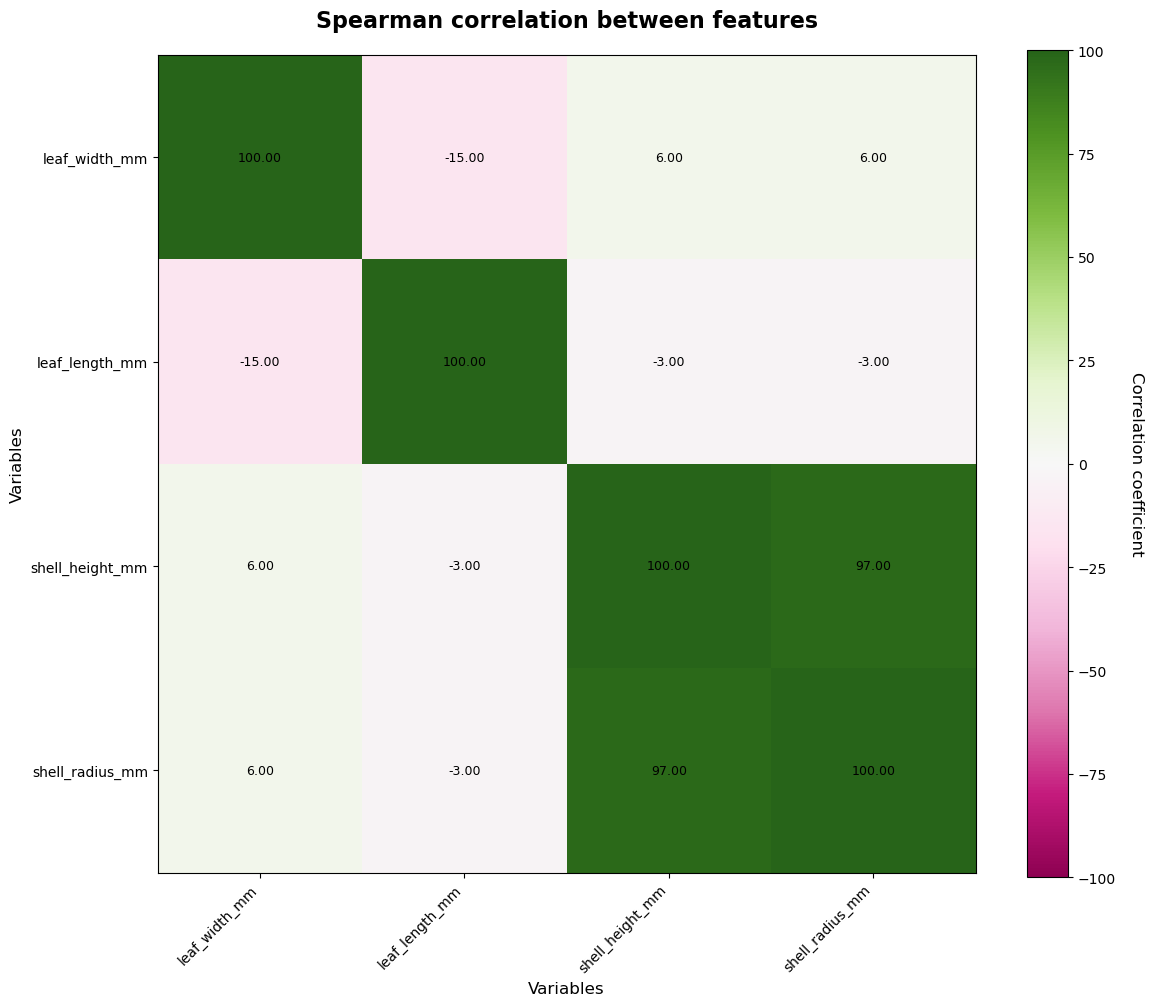

In [8]:
numerical_cols = clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = clean[numerical_cols].corr(method='spearman').round(2) * 100
fig, ax = plt.subplots(figsize=(12, 10))
    
im = ax.imshow(corr_matrix, cmap='PiYG', vmin=-100, vmax=100)
    
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation coefficient', rotation=270, labelpad=20, fontsize=12)
    
n_vars = len(corr_matrix.columns)
ax.set_xticks(np.arange(n_vars))
ax.set_yticks(np.arange(n_vars))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)
    
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha="center", va="center", color="black", fontsize=9)
    
ax.set_title('Spearman correlation between features', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
    
plt.tight_layout()
plt.show()

In [9]:
assert isinstance(raw, pd.DataFrame)
assert isinstance(clean, pd.DataFrame)
assert clean.isna().sum().sum() == 0
assert len(raw.columns) == len(clean.columns)
assert TO_PREDICT in raw.columns
assert TO_PREDICT in clean.columns

# 🔨 Task 2 (1 point): Data transformation and preparation for training

Next step is to prepare data for the model training. The DataFrame created during this task should be called `transformed`.

1. (0.4p) Standardize numeric columns:
   - using the `scikit-learn` package;
   - using just `numpy`;
   - Compare results and show that they are the same or similar enough. If there is any difference, notice how big it is.
2. (0.3p) Encode all categorical columns except snail genus using one-hot encoding from `pandas` or `scikit-learn`. Make sure that in the end, there are N-1 columns for a categorical column with N unique values. Make sure that old categorical columns are not left in the data.
3. (0.2p) Encode the snail genus as integer column using `pandas` or `numpy`. Make sure to create a dictionary `snail_classes` mapping snail genera and integers.
4. (0.1p) Create `X` and `y` from the whole data. The `X` should contain all columns except the snail genus column, and the `y` should contain only the snail genus column and be a `Series` object.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed_1 = clean.copy()
transformed_1[numerical_cols] = scaler.fit_transform(transformed_1[numerical_cols])
transformed_1.head()

,snail_genus,leaf_width_mm,leaf_length_mm,leaf_surface,shell_height_mm,shell_color,shell_radius_mm
0,Spiralina,1.049141,1.467513,hairy,0.253028,striped,-0.672643
1,Slimospira,0.205007,-0.798798,hairy,-1.111115,yellow,-1.111433
2,Mollisphora,0.017421,1.467513,hairy,-0.201686,striped,0.204938
3,Flexorus,-0.123268,-1.053758,smooth,-0.656401,dark,-0.672643
4,Slimospira,-1.623951,0.164384,smooth,-0.656401,yellow,-0.672643


In [11]:
transformed_2 = clean.copy()
transformed_2[numerical_cols] = (transformed_2[numerical_cols] - np.mean(transformed_2[numerical_cols], axis=0)) / np.std(transformed_2[numerical_cols], axis=0)
transformed_2.head()

,snail_genus,leaf_width_mm,leaf_length_mm,leaf_surface,shell_height_mm,shell_color,shell_radius_mm
0,Spiralina,1.049141,1.467513,hairy,0.253028,striped,-0.672643
1,Slimospira,0.205007,-0.798798,hairy,-1.111115,yellow,-1.111433
2,Mollisphora,0.017421,1.467513,hairy,-0.201686,striped,0.204938
3,Flexorus,-0.123268,-1.053758,smooth,-0.656401,dark,-0.672643
4,Slimospira,-1.623951,0.164384,smooth,-0.656401,yellow,-0.672643


In [12]:
transformed_1[numerical_cols].describe()

,leaf_width_mm,leaf_length_mm,shell_height_mm,shell_radius_mm
count,2.595000e+03,2.595000e+03,2.595000e+03,2.595000e+03
mean,-4.107183e-17,6.982212e-17,7.256024e-17,-3.559559e-17
std,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00
min,-2.139811e+00,-1.705323e+00,-2.475257e+00,-2.427804e+00
25%,-9.205059e-01,-9.687718e-01,-6.564005e-01,-6.726427e-01
50%,1.742123e-02,2.273953e-02,-2.016863e-01,2.049379e-01
75%,1.002245e+00,1.070909e+00,7.077421e-01,6.437282e-01
max,1.705690e+00,2.005762e+00,2.526599e+00,2.837680e+00


In [13]:
transformed_2[numerical_cols].describe()

,leaf_width_mm,leaf_length_mm,shell_height_mm,shell_radius_mm
count,2.595000e+03,2.595000e+03,2.595000e+03,2.595000e+03
mean,-3.559559e-17,7.119118e-17,5.613151e-17,1.505967e-17
std,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00
min,-2.139811e+00,-1.705323e+00,-2.475257e+00,-2.427804e+00
25%,-9.205059e-01,-9.687718e-01,-6.564005e-01,-6.726427e-01
50%,1.742123e-02,2.273953e-02,-2.016863e-01,2.049379e-01
75%,1.002245e+00,1.070909e+00,7.077421e-01,6.437282e-01
max,1.705690e+00,2.005762e+00,2.526599e+00,2.837680e+00


In [14]:
diff = (transformed_1[numerical_cols] - transformed_2[numerical_cols]).abs()
diff.describe()

,leaf_width_mm,leaf_length_mm,shell_height_mm,shell_radius_mm
count,2.595000e+03,2.595000e+03,2.595000e+03,2.595000e+03
mean,4.477686e-15,8.703392e-16,8.488393e-16,2.180176e-15
std,2.563659e-15,5.012452e-16,6.175671e-16,1.603346e-15
min,9.020562e-17,5.204170e-18,2.220446e-16,5.551115e-16
25%,2.192690e-15,3.330669e-16,2.775558e-16,6.383782e-16
50%,4.884981e-15,9.992007e-16,6.661338e-16,1.776357e-15
75%,6.439294e-15,1.332268e-15,1.332268e-15,2.886580e-15
max,1.110223e-14,1.998401e-15,2.664535e-15,7.993606e-15


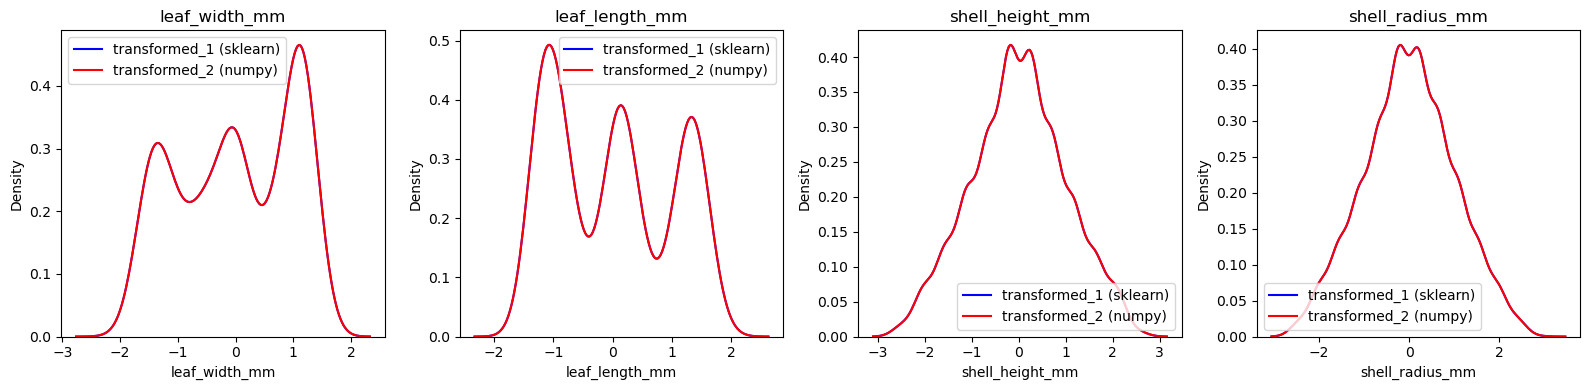

In [15]:
fig, axs = plt.subplots(1, len(numerical_cols), figsize=(16, 4))

for i, col in enumerate(numerical_cols):
    ax = axs[i]
    sns.kdeplot(transformed_1[col], ax=ax, label='transformed_1 (sklearn)', color='blue')
    sns.kdeplot(transformed_2[col], ax=ax, label='transformed_2 (numpy)', color="red")
    ax.set_title(col)
    ax.legend()
plt.tight_layout()
plt.show()

In [16]:
transformed = transformed_1.copy()

Encode all categorical columns except snail genus using one-hot encoding from `pandas` or `scikit-learn`. Make sure that in the end, there are N-1 columns for a categorical column with N unique values. Make sure that old categorical columns are not left in the data.

In [17]:
categorical_cols = transformed.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop("snail_genus")
dummies = pd.get_dummies(transformed[categorical_cols], drop_first=True, dtype=int)
transformed = transformed.drop(columns=categorical_cols).join(dummies)
transformed.head()

,snail_genus,leaf_width_mm,leaf_length_mm,shell_height_mm,shell_radius_mm,leaf_surface_smooth,leaf_surface_waxy,shell_color_dark,shell_color_striped,shell_color_white,shell_color_yellow
0,Spiralina,1.049141,1.467513,0.253028,-0.672643,0,0,0,1,0,0
1,Slimospira,0.205007,-0.798798,-1.111115,-1.111433,0,0,0,0,0,1
2,Mollisphora,0.017421,1.467513,-0.201686,0.204938,0,0,0,1,0,0
3,Flexorus,-0.123268,-1.053758,-0.656401,-0.672643,1,0,1,0,0,0
4,Slimospira,-1.623951,0.164384,-0.656401,-0.672643,1,0,0,0,0,1


In [18]:
labels, uniques = pd.factorize(transformed["snail_genus"])
transformed["snail_genus"] = labels.astype(int)
snail_classes = {genus: int(label) for label, genus in enumerate(uniques)}

In [19]:
snail_classes

{'Spiralina': 0,
 'Slimospira': 1,
 'Mollisphora': 2,
 'Flexorus': 3,
 'Helixoda': 4,
 'Caracolus': 5,
 'Lunaspira': 6}

In [20]:
X = transformed.drop(columns=["snail_genus"]).copy()
y = transformed["snail_genus"].copy()

In [21]:
assert isinstance(transformed, pd.DataFrame)
assert transformed.isna().sum().sum() == 0
assert len(transformed.columns) > len(clean.columns)
assert TO_PREDICT in transformed.columns
assert transformed[TO_PREDICT].dtype == int
assert str not in transformed.dtypes  # CHECK IF WORKS
assert 2 in transformed[TO_PREDICT]
assert isinstance(X, pd.DataFrame)
assert len(X.columns) == len(transformed.columns) - 1
assert isinstance(y, pd.Series)
assert isinstance(snail_classes, dict)

# 🎓 Task 3 (1 point): Model training and evaluation

Write a function named `split_and_train_model` which uses the standard model training pipeline:
- It should take `X`, `y`, `random_seed`, and a function (type `Callable`) to create the model. It should also take an optional `max_iter` parameter with default value of 300.
- Inside, it should:
   - Correctly split `X` and `y` into `X_train`, `y_train`, `X_test`, `y_test`. You can use different names but the structure should remain the same. Use test size of 20%. Use `random_seed` to fix the random state of data splitting.
   - Create an instance of the chosen model (by calling the provided function), with its random seed fixed to `random_seed` parameter.
   - Use the model to fit `X_train` and `y_train`.
   - Use the fitted model to generate predictions from `X_test`.
   - Calculate the accuracy score by comparing `y_test` and obtained predictions. Print out the score (formatted using f-string).
   - Return the trained model.
   - In case of **any** exception, do not raise it, but print out the error message and return `None` instead.

As an usage example, use this function with the data prepared in Task 2 and `LogisticRegression` from `scikit-learn`.

In [22]:
from sklearn.linear_model import LogisticRegression
def split_and_train_model(X, y, random_seed, Callable, max_iter = 300):
    try:
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import accuracy_score

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

        model = Callable(max_iter=max_iter, random_state=random_seed)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    return model

split_and_train_model(X, y, random_seed=42, Callable=LogisticRegression)

Train Accuracy: 0.7004
Test Accuracy: 0.7071


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [23]:
# no asserts there!

# 🧩 Task 4 (2 points): Feature extraction - clustering

Someone from SNAILAB theorized that knowing the genus of the plant which the leaf belongs to should help predict the genus of the snail, as certain snails are attracted to certain plants. However, the dataset does not contain plant names, and either way, plant identification requires additional time and skill.

Instead, you can use unsupervised learning to cluster plant features and use this information as a new feature.

1. (0.1p) Create a new DataFrame `plants` containing only plant features from `transformed`. Here, you are allowed to write column names manually.
2. (0.9p) You will use several clustering methods: [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html), [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), and [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). They allow to provide different clustering parameters. Create a list `cluster_setups` containing `tuple[str, Callable, dict]` items (setups), where `str` is a short model name just for printing purposes, `Callable` is the clustering function (which you will call), and `dict` is a dictionary of 1-2 parameters to provide to that function.
   - There should be several setups for each clustering method. Use `for` loops to create those setups automatically by going through lists of possible parameters. You are allowed to write the lists manually or use `np.linspace` and similar functions:
      - For Affinity Propagation, use 2-3 different `damping` values between 0.6 and 0.9;
      - For Spectral Clustering and KMeans, use 4-5 `n_clusters` values between 3 and 20.
      - For DBSCAN, use 4-5 `eps` values between 0.1 and 0.5, and 4-5 `min_samples` values between 5 and 40 (so each DBSCAN setup had two provided parameters instead of one).
3. (1.0p) For each setup in `cluster_setups`, fit a clustering model on `plants` data and get the preidcted labels for all plants. Save the labels into a dictionary `obtained_clusters` which should be of type `dict[str, list]`, The `str` keys should be some kind of automatically generated short model descriptions (e.g. use f-string and include used parameter values in it). The `list` values should be lists of predicted cluster labels.
   - You may want to use `tqdm` at this point, as some clustering methods are slower.

In [24]:
transformed.columns

Index(['snail_genus', 'leaf_width_mm', 'leaf_length_mm', 'shell_height_mm',
       'shell_radius_mm', 'leaf_surface_smooth', 'leaf_surface_waxy',
       'shell_color_dark', 'shell_color_striped', 'shell_color_white',
       'shell_color_yellow'],
      dtype='object')

In [25]:
plants = transformed[['leaf_width_mm', 'leaf_length_mm', 'leaf_surface_smooth', 'leaf_surface_waxy']].copy()

In [26]:
from sklearn.cluster import AffinityPropagation, DBSCAN, KMeans, SpectralClustering
cluster_setups = []
str_list = [AffinityPropagation, DBSCAN, KMeans, SpectralClustering]
damping = np.linspace(0.6, 0.9, 3).tolist()
n_clusters = np.linspace(3, 20, 5).astype(int).tolist()
eps = np.linspace(0.1, 0.5, 5).tolist()
min_samples = np.linspace(5, 40, 5).astype(int).tolist()
for method in str_list:
    name_base = method.__name__
    if method is AffinityPropagation:
        for d in damping:
            cluster_setups.append((f"{name_base}", method, {'damping': d}))
    elif method is DBSCAN:
        for e in eps:
            for m in min_samples:
                cluster_setups.append((f"{name_base}", method, {'eps': e, 'min_samples': m}))
    elif method is KMeans:
        for n in n_clusters:
            cluster_setups.append((f"{name_base}", method, {'n_clusters': n}))
    elif method is SpectralClustering:
        for n in n_clusters:
            cluster_setups.append((f"{name_base}", method, {'n_clusters': n}))

In [27]:
from tqdm import tqdm

obtained_clusters = {}

for name, model_class, params in tqdm(cluster_setups):
    
    model = model_class(**params)
    
    labels = model.fit_predict(plants)
    
    name = f"{name}_{'_'.join(f'{k}={v}' for k, v in params.items())}"
    
    obtained_clusters[name] = labels.tolist()

100%|██████████| 38/38 [00:18<00:00,  2.05it/s]


In [28]:
assert isinstance(plants, pd.DataFrame)
assert isinstance(cluster_setups, list)
assert isinstance(obtained_clusters, dict)
assert len(cluster_setups) == len(obtained_clusters)
assert len(cluster_setups) >= 26

# 👑 Task 5 (2 points): Using extracted features to improve the result

The only thing left now is to check which clustering setup produced a new feature (predicted plant clusters) which improves the Logistic Regression model trained in Task 3.

1. (1.0p) For each plant clustering result from Task 4, check if it improves the accuracy of logistic regression:
   - Create a new variable `XX` containing the `X` from Task 2 but joined with the new feature. If the shape of `X` was (M, N), then the shape of `XX` should be (M, N+1).
   - Using already written `split_and_train_model` function, create and fit a new logistic regression model on `XX` (`y` remains unchanged from Task 2). You may need to increase `max_iter` here. Don't forget to use the same random seed for all models.
2. (1.0p) Automatically find the feature which produced the best result from all trained Logistic Regression models. Print out its name and received accuracy score.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

results = {}

for idx, (cluster_name, labels) in enumerate(tqdm(obtained_clusters.items())):
    col = f"cluster_{idx}"
    XX = X.copy()
    XX[col] = labels 
    
    model = split_and_train_model(XX, y, random_seed=42, Callable=LogisticRegression, max_iter=1000)
    
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[cluster_name] = acc

best_name = max(results, key=results.get)
print(f"Best cluster feature: {best_name} with accuracy {results[best_name]:.4f}")

  3%|▎         | 1/38 [00:00<00:13,  2.82it/s]

Train Accuracy: 0.7158
Test Accuracy: 0.6879


  5%|▌         | 2/38 [00:00<00:11,  3.03it/s]

Train Accuracy: 0.7351
Test Accuracy: 0.7283


 11%|█         | 4/38 [00:01<00:09,  3.73it/s]

Train Accuracy: 0.7408
Test Accuracy: 0.7360
Train Accuracy: 0.7317
Test Accuracy: 0.7495


 16%|█▌        | 6/38 [00:01<00:05,  5.49it/s]

Train Accuracy: 0.6932
Test Accuracy: 0.6994
Train Accuracy: 0.7066
Test Accuracy: 0.7091
Train Accuracy: 0.6999
Test Accuracy: 0.7033
Train Accuracy: 0.7023
Test Accuracy: 0.7071


 26%|██▋       | 10/38 [00:01<00:03,  8.01it/s]

Train Accuracy: 0.7818
Test Accuracy: 0.7919
Train Accuracy: 0.7563
Test Accuracy: 0.7765


 29%|██▉       | 11/38 [00:01<00:03,  7.62it/s]

Train Accuracy: 0.7726
Test Accuracy: 0.7900


 34%|███▍      | 13/38 [00:02<00:03,  7.21it/s]

Train Accuracy: 0.7423
Test Accuracy: 0.7399
Train Accuracy: 0.7669
Test Accuracy: 0.7514
Train Accuracy: 0.7505
Test Accuracy: 0.7514


 42%|████▏     | 16/38 [00:02<00:02,  8.05it/s]

Train Accuracy: 0.7678
Test Accuracy: 0.7726
Train Accuracy: 0.7818
Test Accuracy: 0.7919


 47%|████▋     | 18/38 [00:02<00:02,  7.61it/s]

Train Accuracy: 0.7630
Test Accuracy: 0.7861
Train Accuracy: 0.7669
Test Accuracy: 0.7900
Train Accuracy: 0.7264
Test Accuracy: 0.7187
Train Accuracy: 0.7317
Test Accuracy: 0.7322


 55%|█████▌    | 21/38 [00:03<00:01, 11.64it/s]

Train Accuracy: 0.7187
Test Accuracy: 0.7283
Train Accuracy: 0.7192
Test Accuracy: 0.7360


 68%|██████▊   | 26/38 [00:03<00:00, 12.68it/s]

Train Accuracy: 0.7225
Test Accuracy: 0.7303
Train Accuracy: 0.7264
Test Accuracy: 0.7187
Train Accuracy: 0.7264
Test Accuracy: 0.7187
Train Accuracy: 0.7322
Test Accuracy: 0.7322
Train Accuracy: 0.7153
Test Accuracy: 0.7283


 79%|███████▉  | 30/38 [00:03<00:00, 15.12it/s]

Train Accuracy: 0.7245
Test Accuracy: 0.7360
Train Accuracy: 0.7461
Test Accuracy: 0.7457
Train Accuracy: 0.7331
Test Accuracy: 0.7322


 84%|████████▍ | 32/38 [00:03<00:00, 10.88it/s]

Train Accuracy: 0.7755
Test Accuracy: 0.7688
Train Accuracy: 0.7750
Test Accuracy: 0.7688


 95%|█████████▍| 36/38 [00:04<00:00, 11.43it/s]

Train Accuracy: 0.7717
Test Accuracy: 0.7746
Train Accuracy: 0.7909
Test Accuracy: 0.7842
Train Accuracy: 0.7558
Test Accuracy: 0.7823
Train Accuracy: 0.7519
Test Accuracy: 0.7457


100%|██████████| 38/38 [00:04<00:00,  8.28it/s]

Train Accuracy: 0.7596
Test Accuracy: 0.7572
Train Accuracy: 0.7741
Test Accuracy: 0.7495
Best cluster feature: DBSCAN_eps=0.2_min_samples=5 with accuracy 0.7919


In [30]:
# no asserts again!

https://github.com/aistejar/Homework-4